In [19]:
from sklearn.datasets import fetch_openml
import pandas as pd

# Fetch MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

# Convert to DataFrame
df = pd.DataFrame(mnist.data)
df['label'] = mnist.target

print(df.head())


   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9   
0       0       0       0       0       0       0       0       0       0  \
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel10  ...  pixel776  pixel777  pixel778  pixel779  pixel780  pixel781   
0        0  ...         0         0         0         0         0         0  \
1        0  ...         0         0         0         0         0         0   
2        0  ...         0         0         0         0         0         0   
3        0  ...         0         0         0         0         0         0   
4        0  ...         0         0         0         0         0         0   

   pixel782  pixel783  pixel784  label  
0         0         0

In [20]:
df.shape

(70000, 785)

In [21]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['label'])  # Features
y = df['label']  # Target (labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

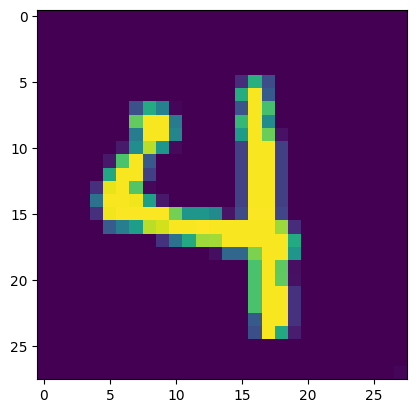

In [22]:
import matplotlib.pyplot as plt
plt.imshow(pd.to_numeric(df.iloc[18306, 1:], errors='coerce').values.reshape(28,28))

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
y_pred = knn.predict(X_test)

In [25]:
# 33 seconds lge knn ko
# accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9700714285714286

In [26]:
# using pca
# step 1: data standardisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# pca's
from sklearn.decomposition import PCA
pca = PCA(n_components = 100)
# n_components = None mtlb jitne features the utne hi pc lelia
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [27]:
X_train.shape
# 784 se 100 columns rhgye h hmare ps

(56000, 784)

In [29]:
knn= KNeighborsClassifier()
knn.fit(X_train_trf, y_train)

KNeighborsClassifier()

In [30]:
y_pred = knn.predict(X_test_trf)

In [ ]:
accuracy_score(y_test,y_pred)
# knn p bina pca apply kis ahm 97 accuracy p the
# pca apply kis hmne or fr same algorithm knn ko vo data dia
# pca apply krne k bd 784 m se sirf 100 columns hmne lia or accuracy aai hmari 95, which is very good.
# jb tk best possible accuracy nhi milta hm components bdhate rhenge.


0.9587857142857142

In [32]:
for i in range(1,785):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)

    knn = KNeighborsClassifier()
    knn.fit(X_train_trf,y_train)

    y_pred = knn.predict(X_test_trf)

    print(accuracy_score(y_test,y_pred))

0.25642857142857145
0.32107142857142856
0.5111428571428571
0.6697142857142857
0.7385
0.8270714285714286
0.8442142857142857
0.8766428571428572
0.8907142857142857
0.9115
0.9192142857142858
0.924
0.9306428571428571
0.9371428571428572
0.9414285714285714
0.9436428571428571
0.9441428571428572
0.9450714285714286
0.9486428571428571
0.9484285714285714
0.9495714285714286
0.9496428571428571
0.9509285714285715
0.9505714285714286
0.9507142857142857
0.9508571428571428
0.9523571428571429
0.9529285714285715
0.9541428571428572
0.9548571428571428
0.9545714285714286
0.9557857142857142
0.9562142857142857
0.9560714285714286
0.9573571428571429
0.9575714285714285
0.957
0.9586428571428571
0.9589285714285715
0.9589285714285715
0.9586428571428571
0.959
0.9591428571428572
0.9587142857142857
0.9594285714285714
0.9597857142857142
0.9597142857142857
0.9596428571428571
0.9598571428571429
0.9588571428571429
0.9587857142857142


KeyboardInterrupt: 

In [33]:
# Visualising using pca
# transforming to a 2D coordinate system
pca = PCA(n_components = 2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)
X_train_trf

array([[ -0.66184663,  -3.52844877],
       [ -2.4256249 ,  -3.51506096],
       [ -3.5671334 ,   4.78236184],
       ...,
       [ -8.34347904,  -1.19630488],
       [ 10.4937875 ,  -9.03606709],
       [ 10.57302752, -12.31764924]])

In [ ]:
import plotly.express as px 
y_train_trf = y_train.astype(str) 
fig = px.scatter(x = X_train_trf[:,0], y = X_train_trf[:,1], color = y_train_trf, color_discrete_sequence = px.colors.qualitative.G10 )

import plotly.io as pio
pio.renderers.default = "browser"
fig.show()

In [ ]:
pca.explained_variance_
# hmne top 2 choose kia the to top 2 ki eigen values aai h

array([40.6329685 , 29.01311301])

In [ ]:
pca.components_
# dono eigen vectors
# shape 784 of 1 vector

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [-0., -0., -0., ..., -0., -0., -0.]])

In [42]:
pca.explained_variance_ratio_

array([0.05674894, 0.04052038])

In [43]:
pca = PCA(n_components = None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)
import numpy as np
np.cumsum(pca.explained_variance_ratio_)
# phle frst ka sum
# fr agle 2 ka
# fr agle 3 ka

array([0.05674894, 0.09726933, 0.13486432, 0.16394266, 0.18922822,
       0.2112008 , 0.23034992, 0.24791485, 0.26323209, 0.27717496,
       0.29064362, 0.30274463, 0.31395047, 0.32494179, 0.33525705,
       0.34523224, 0.35461032, 0.36383165, 0.37276159, 0.38140025,
       0.38962348, 0.39763208, 0.40530461, 0.41275343, 0.4199253 ,
       0.42684165, 0.43363123, 0.44023178, 0.44655255, 0.45267144,
       0.45868955, 0.46459041, 0.47026563, 0.4758571 , 0.48140571,
       0.4867798 , 0.4920408 , 0.49724346, 0.50237036, 0.50721194,
       0.51199592, 0.51667851, 0.5212608 , 0.52580576, 0.53028051,
       0.5346804 , 0.53906093, 0.54337629, 0.54763368, 0.55181705,
       0.55593261, 0.5599607 , 0.56395699, 0.56790803, 0.57180668,
       0.57555611, 0.57927153, 0.58297237, 0.58659865, 0.59018836,
       0.59372061, 0.59720922, 0.60065098, 0.60407883, 0.6074625 ,
       0.61078319, 0.61407195, 0.61730706, 0.62049057, 0.62365472,
       0.62677964, 0.62988218, 0.6329545 , 0.63598082, 0.63897

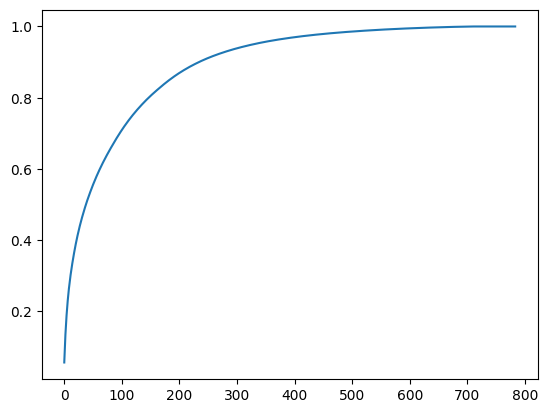

In [44]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [37]:
import nbformat
print(nbformat.__version__)

5.10.4
